In [ ]:
#Name: Muftasim Fuad Mahee ID: 22201317 Section: 02
#Task1(a)
import pandas as pd
df = pd.read_csv('/content/imdb_440.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
#Task1(b)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
y = df['sentiment']

In [ ]:
#Task1(c)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Task1(d)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

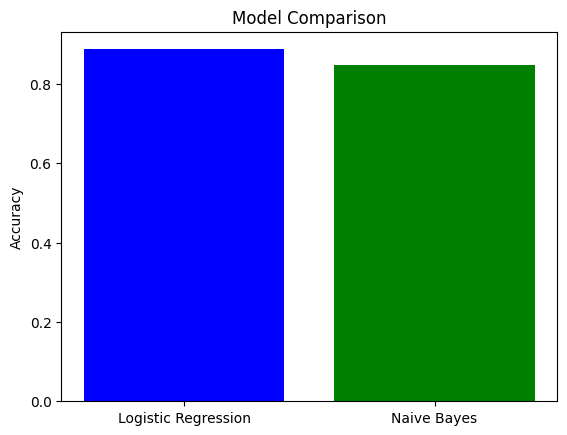

Logistic Regression Accuracy: 0.89
Naive Bayes Accuracy: 0.85


In [ ]:
#Task1(e)
from sklearn.metrics import accuracy_score
log_reg_pred = log_reg.predict(X_test)
nb_pred = nb_model.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
nb_acc = accuracy_score(y_test, nb_pred)
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [log_reg_acc, nb_acc]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()
print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")

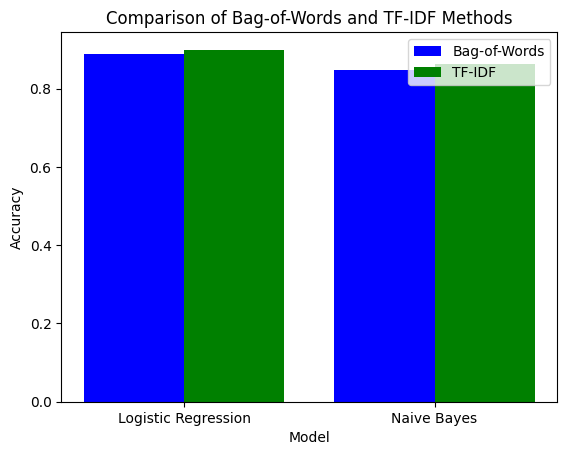

Bag-of-Words Results:
Logistic Regression Accuracy: 0.89
Naive Bayes Accuracy: 0.85

TF-IDF Results:
Logistic Regression Accuracy: 0.90
Naive Bayes Accuracy: 0.86


In [ ]:
#Task2
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
log_reg.fit(X_train_tfidf, y_train)
nb_model.fit(X_train_tfidf, y_train)
tfidf_log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_tfidf))
tfidf_nb_acc = accuracy_score(y_test, nb_model.predict(X_test_tfidf))
bow_log_reg_acc = log_reg_acc
bow_nb_acc = nb_acc
methods = ['Logistic Regression', 'Naive Bayes']
bow_accuracies = [bow_log_reg_acc, bow_nb_acc]
tfidf_accuracies = [tfidf_log_reg_acc, tfidf_nb_acc]
x = range(len(methods))

plt.bar(x, bow_accuracies, width=0.4, label='Bag-of-Words', align='center', color='blue')
plt.bar([p + 0.4 for p in x], tfidf_accuracies, width=0.4, label='TF-IDF', align='center', color='green')

plt.xticks([p + 0.2 for p in x], methods)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Bag-of-Words and TF-IDF Methods')
plt.legend()
plt.show()

print("Bag-of-Words Results:")
print(f"Logistic Regression Accuracy: {bow_log_reg_acc:.2f}")
print(f"Naive Bayes Accuracy: {bow_nb_acc:.2f}")
print("\nTF-IDF Results:")
print(f"Logistic Regression Accuracy: {tfidf_log_reg_acc:.2f}")
print(f"Naive Bayes Accuracy: {tfidf_nb_acc:.2f}")

**Task3**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

le = LabelEncoder()
y_encoded = le.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(df['review'], y_encoded, test_size=0.2, random_state=42)


tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=150)
X_test_pad = pad_sequences(X_test_seq, maxlen=150)


embedding_index = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=150, trainable=False))
model.add(Bidirectional(LSTM(10, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=50, batch_size=32, validation_data=(X_test_pad, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.6256 - loss: 0.6299 - val_accuracy: 0.8091 - val_loss: 0.4220
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8106 - loss: 0.4415 - val_accuracy: 0.8335 - val_loss: 0.3822
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8316 - loss: 0.4013 - val_accuracy: 0.8435 - val_loss: 0.3492
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8448 - loss: 0.3736 - val_accuracy: 0.8497 - val_loss: 0.3369
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8510 - loss: 0.3554 - val_accuracy: 0.8555 - val_loss: 0.3306
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8588 - loss: 0.3473 - val_accuracy: 0.8633 - val_loss: 0.3195
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8658 - loss: 0.3325 - val_accuracy: 0.8659 - val_loss: 0.3123
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8674 -

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Deep Learning Model Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8710 - loss: 0.3319
Deep Learning Model Accuracy: 0.87


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (32, 150, 100)              │      11,228,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (32, 20)                    │           8,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 20)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 10)                    │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (32, 10)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,255,405 (42.94 MB)

 Trainable params: 9,101 (35.55 KB)

 Non-trainable params: 11,228,100 (42.83 MB)

 Optimizer params: 18,204 (71.11 KB)